# Aesth datasets with info score

In [1]:
from aestheval.data.datasets import AVA, Reddit, PCCD
import torch
from tqdm import tqdm
SPLITS = ('train', 'validation', 'test')

ava_dataset = [AVA(split, dataset_path="/media/data-storage/datasets/ava", load_images=False, informativeness=True) for split in SPLITS]


/home/daniel/anaconda3/envs/aestheval/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/daniel/anaconda3/envs/aestheval/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE
  warn(f"Failed to load image Python extension: {e}")


Using path:  /media/data-storage/datasets/ava/processed_info_train.json
Using path:  /media/data-storage/datasets/ava/processed_info_validation.json
Using path:  /media/data-storage/datasets/ava/processed_info_test.json


In [2]:
reddit_dataset = [Reddit(split, dataset_path="/media/data-storage/datasets/reddit", load_images=False, informativeness=True) for split in SPLITS]
pccd_dataset = [PCCD(split, dataset_path="/media/data-storage/datasets/PCCD", load_images=False, informativeness=True) for split in SPLITS]

dataset = torch.utils.data.ConcatDataset(ava_dataset + reddit_dataset + pccd_dataset)

Using path:  /media/data-storage/datasets/reddit/processed_info_train.json
Using path:  /media/data-storage/datasets/reddit/processed_info_validation.json
Using path:  /media/data-storage/datasets/reddit/processed_info_test.json
Using path:  /media/data-storage/datasets/PCCD/processed_info_train.json
Using path:  /media/data-storage/datasets/PCCD/processed_info_validation.json
Using path:  /media/data-storage/datasets/PCCD/processed_info_test.json


In [3]:
len(dataset)

332016

In [9]:
ncomments={
    'ava':[],
    'reddit': [],
    'pccd':[]
    }
nwords={
    'ava':[],
    'reddit': [],
    'pccd':[]
    }
info_score={
    'ava':[],
    'reddit': [],
    'pccd':[]
    }

comments={
    'ava':[],
    'reddit': [],
    'pccd':[]
}
for im, d in dataset:
    # print(d)
    ncomments[d['dataset_name']].append(len(d['comments']))
    nwords[d['dataset_name']].extend([len(x.split()) for x in d['comments']])
    info_score[d['dataset_name']].extend([score for score in d['info_scores'] if score!=float('inf')])
    comments[d['dataset_name']].extend(d['comments'])

count    253961.000000
mean         13.206925
std          13.129594
min           1.000000
25%           6.000000
50%          10.000000
75%          16.000000
max         367.000000
Name: ava, dtype: float64
count    73820.00000
mean         2.97735
std          3.70015
min          1.00000
25%          1.00000
50%          2.00000
75%          3.00000
max        126.00000
Name: reddit, dtype: float64
count    4235.000000
mean        6.334120
std         1.151924
min         2.000000
25%         5.000000
50%         7.000000
75%         7.000000
max         7.000000
Name: pccd, dtype: float64


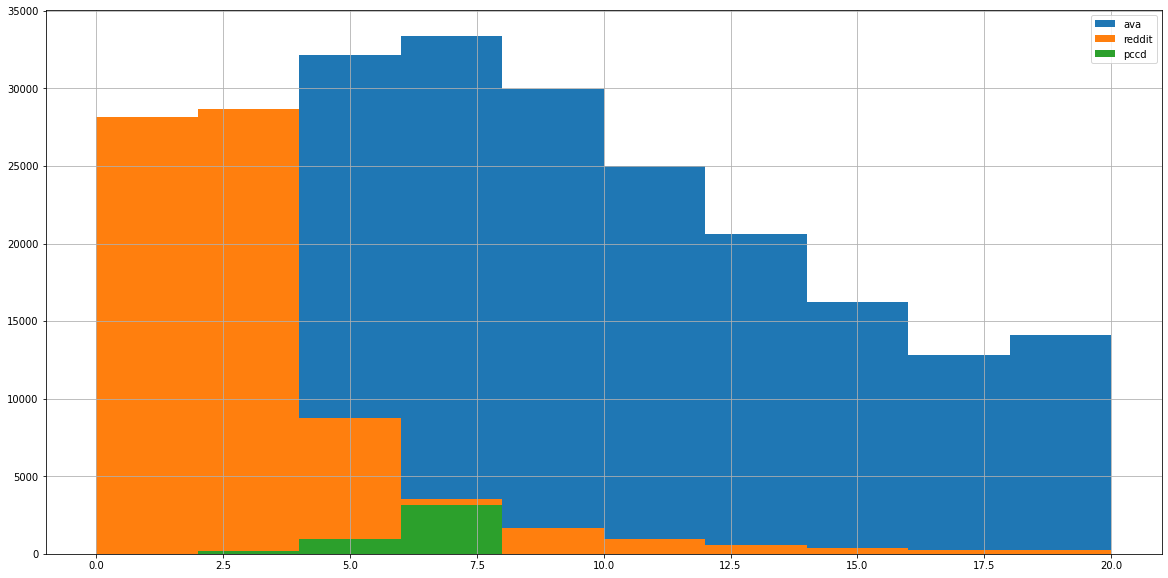

In [10]:
import pandas as pd
for name, data in ncomments.items():
    s = pd.Series(data, name=name)
    print(s.describe())
    s.hist(bins=10, range=[0, 20], figsize=(20,10), legend=True)

count    3.354044e+06
mean     1.570160e+01
std      1.701090e+01
min      1.000000e+00
25%      5.000000e+00
50%      1.100000e+01
75%      2.000000e+01
max      2.146000e+03
Name: ava, dtype: float64
count    219788.000000
mean         49.133720
std          55.505585
min           1.000000
25%          16.000000
50%          33.000000
75%          61.000000
max        1286.000000
Name: reddit, dtype: float64
count    26825.000000
mean        41.594893
std         41.787002
min          1.000000
25%         14.000000
50%         30.000000
75%         56.000000
max        780.000000
Name: pccd, dtype: float64


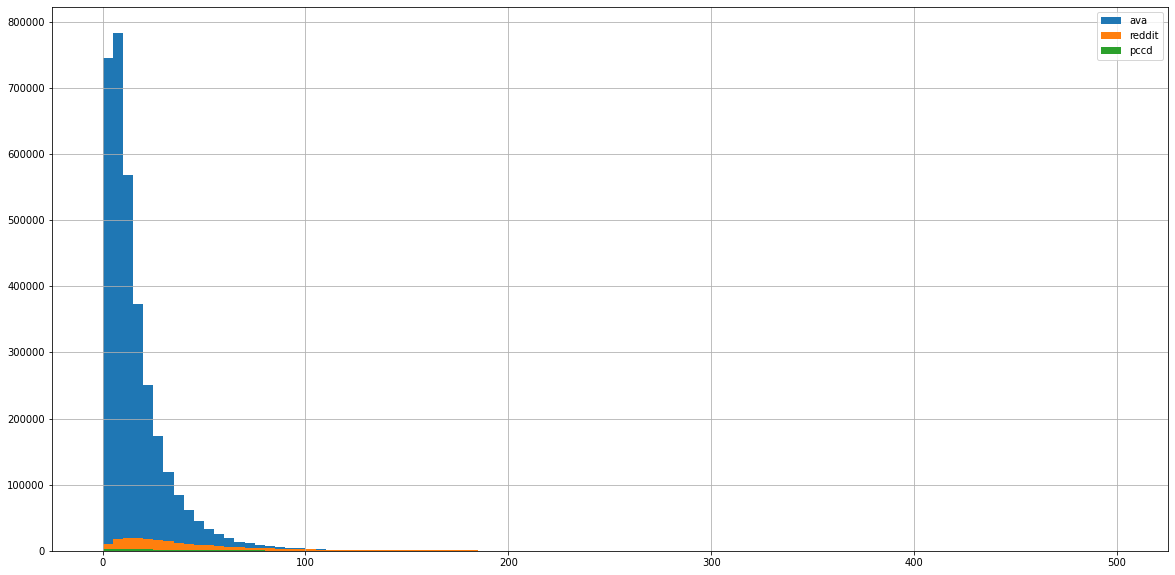

In [11]:
for name, data in nwords.items():
    s = pd.Series(data, name=name)
    print(s.describe())
    s.hist(bins=100, figsize=(20,10), legend=True, range=[0,500])

In [12]:
for i in range(5):
    print(dataset[i])


(None, {'im_id': '953417', 'im_score': 6.11290322581, 'query': 1396, 'im_name': '953417.jpg', 'comments': ["6.1! Nice! You have mad macro skills! You'll notice I don't have any... because I suck at it.", 'Frog with attitude; love it.  Reminds me of Jabba of Star Wars, lol. (voted earlier)', 'he does look kind of lonely. Funky colors.', "No thanks, he is quite blue is'nt he, I like this.", 'great shot!', 'Very cute!', 'Funny shot. Very nice perspective and lovely colors.'], 'sentiment': {0: {'Negative': 0.3295336663722992, 'Neutral': 0.2320113182067871, 'Positive': 0.4384550452232361}, 1: {'Negative': 0.005600472446531057, 'Neutral': 0.03543514013290405, 'Positive': 0.9589643478393555}, 2: {'Negative': 0.5221530795097351, 'Neutral': 0.4549880623817444, 'Positive': 0.022858841344714165}, 3: {'Negative': 0.03750083968043327, 'Neutral': 0.2324349284172058, 'Positive': 0.7300642728805542}, 4: {'Negative': 0.013107659295201302, 'Neutral': 0.0535711906850338, 'Positive': 0.9333211183547974}, 

count    2.545571e+06
mean     3.243623e+01
std      3.255383e+01
min      1.613968e+00
25%      1.071335e+01
50%      2.286119e+01
75%      4.269820e+01
max      3.722200e+02
Name: ava, dtype: float64
count    193555.000000
mean         78.612339
std          69.789360
min           1.823322
25%          28.615520
50%          57.512808
75%         106.205990
max         372.220036
Name: reddit, dtype: float64
count    25267.000000
mean        72.961306
std         65.590682
min          1.575003
25%         25.540869
50%         54.472016
75%        100.380396
max        372.220036
Name: pccd, dtype: float64


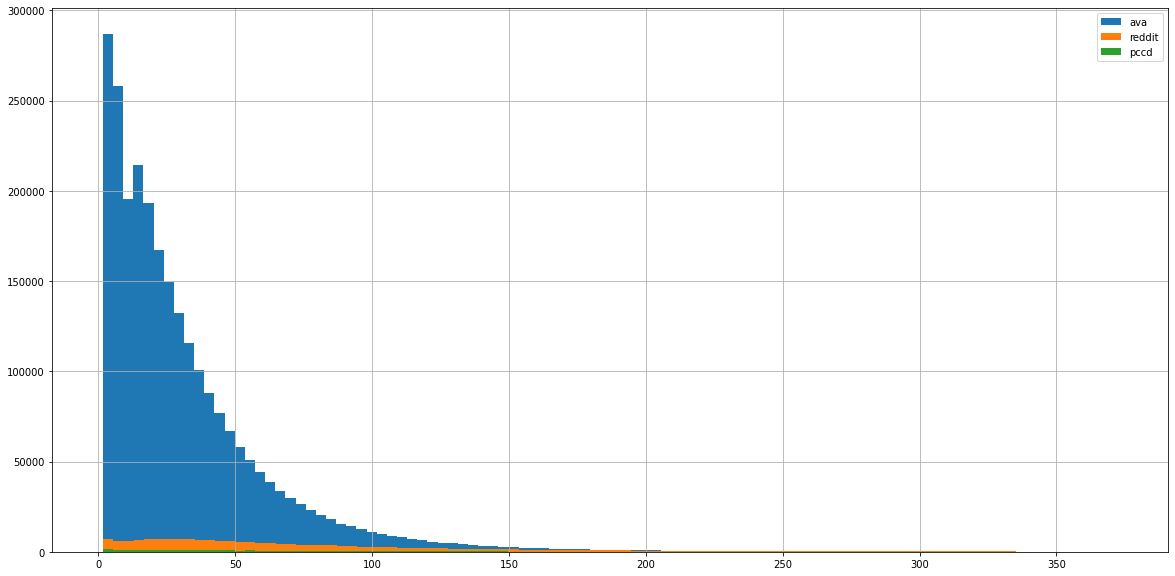

In [13]:
# Distribution of informativeness score per dataset

for name, data in info_score.items():
    s = pd.Series(data, name=name)
    print(s.describe())
    s.hist(bins=100, figsize=(20,10), legend=True)

